In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import random
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
# Get the parent directory where dataset is located
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Move up one level

# Set dataset path correctly
dataset_path = os.path.join(BASE_DIR, "task2", "dataset", "raw-img")

print("Dataset Path:", dataset_path)

# Check if dataset exists
if not os.path.exists(dataset_path):
    print("❌ ERROR: Dataset folder not found. Please check its location!")
else:
    print("✅ Dataset folder found.")

Dataset Path: C:\Users\mar4u\Documents\DS-Test-2025\task2\dataset\raw-img
✅ Dataset folder found.


In [3]:
#Get class names
classes = sorted([cls for cls in os.listdir(dataset_path) if not cls.startswith('.')])
print("Animal Classes:", classes)

Animal Classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [4]:
#Count number of images per class
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}
print(class_counts)

{'butterfly': 2112, 'cat': 1668, 'chicken': 3098, 'cow': 1866, 'dog': 4863, 'elephant': 1446, 'horse': 2623, 'sheep': 1820, 'spider': 4821, 'squirrel': 1862}


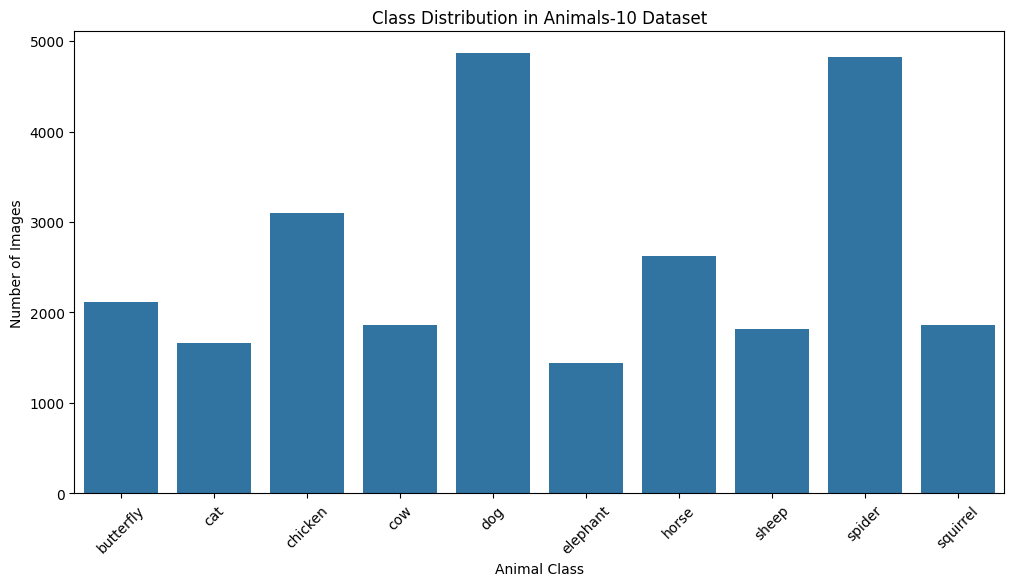

In [5]:
#Plot class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Animal Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Animals-10 Dataset")
plt.show()

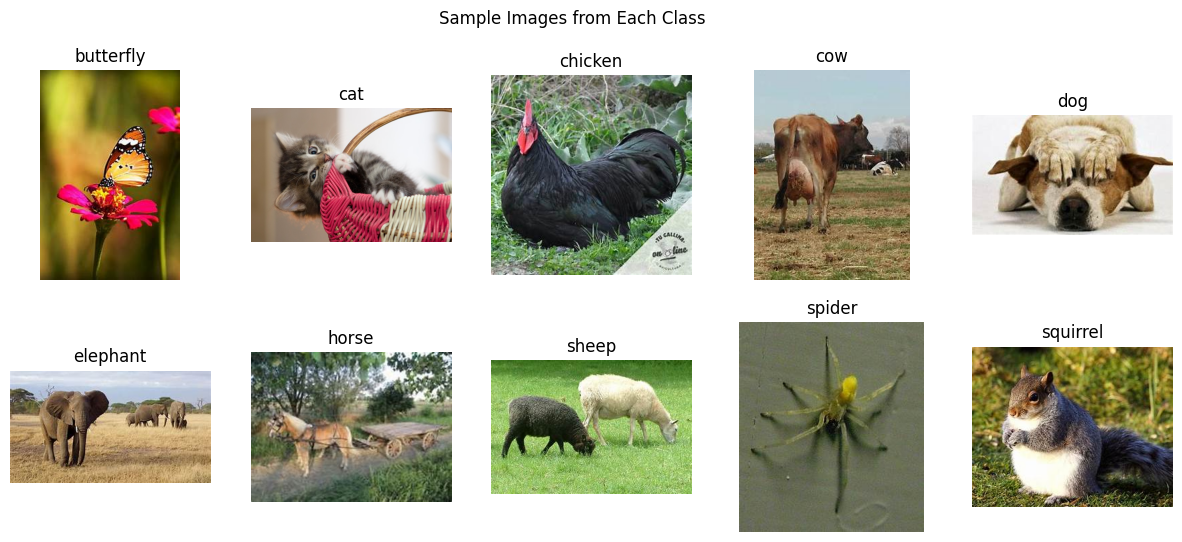

In [6]:
#Load and display random sample images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class")

for ax, cls in zip(axes.flat, classes):
    img_list = os.listdir(os.path.join(dataset_path, cls))
    img_path = os.path.join(dataset_path, cls, random.choice(img_list))  # Select random image
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(cls)
    ax.axis("off")

plt.show()

In [7]:
#Check image dimensions
image_sizes = []
for cls in classes:
    img_list = os.listdir(os.path.join(dataset_path, cls))
    img_path = os.path.join(dataset_path, cls, random.choice(img_list))  # Select random image
    img = Image.open(img_path)
    image_sizes.append(img.size)

In [8]:
#Display image size statistics
image_widths, image_heights = zip(*image_sizes)
print("Average Image Size:", np.mean(image_widths), "x", np.mean(image_heights))


Average Image Size: 294.0 x 261.0


In [9]:
#Split dataset into train, validation, and test
train_data, test_data = train_test_split(classes, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print(f"Training set: {len(train_data)} classes")
print(f"Validation set: {len(val_data)} classes")
print(f"Test set: {len(test_data)} classes")

Training set: 6 classes
Validation set: 2 classes
Test set: 2 classes
